In [58]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(13,8)})


from sklearn.preprocessing import LabelEncoder 

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("/Users/debdeepsanyal/Downloads/star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [25]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

all features except the class are numeric, we can convert it using label encoder

In [27]:
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


we wish to plot pdf s of the different features, we can do it using KDEplot in seaborn

In [28]:
def plot(col):
    for i in range(3):
        sns.kdeplot(data = df[df["class"]==i][col], label = le.inverse_transform([i]))
    sns.kdeplot(data = df[col], label = ["all"])
    plt.legend()
    

In [29]:
def log_plot(col):
    for i in range(3):
        sns.kdeplot(data = np.log(df[df["class"]==i][col]), label = le.inverse_transform([i]))
    sns.kdeplot(data = np.log(df[col]), label = "all")
    plt.legend()

Since id is not related to celestial classification, drop the feature

In [30]:
df = df.drop(['obj_ID'], axis = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


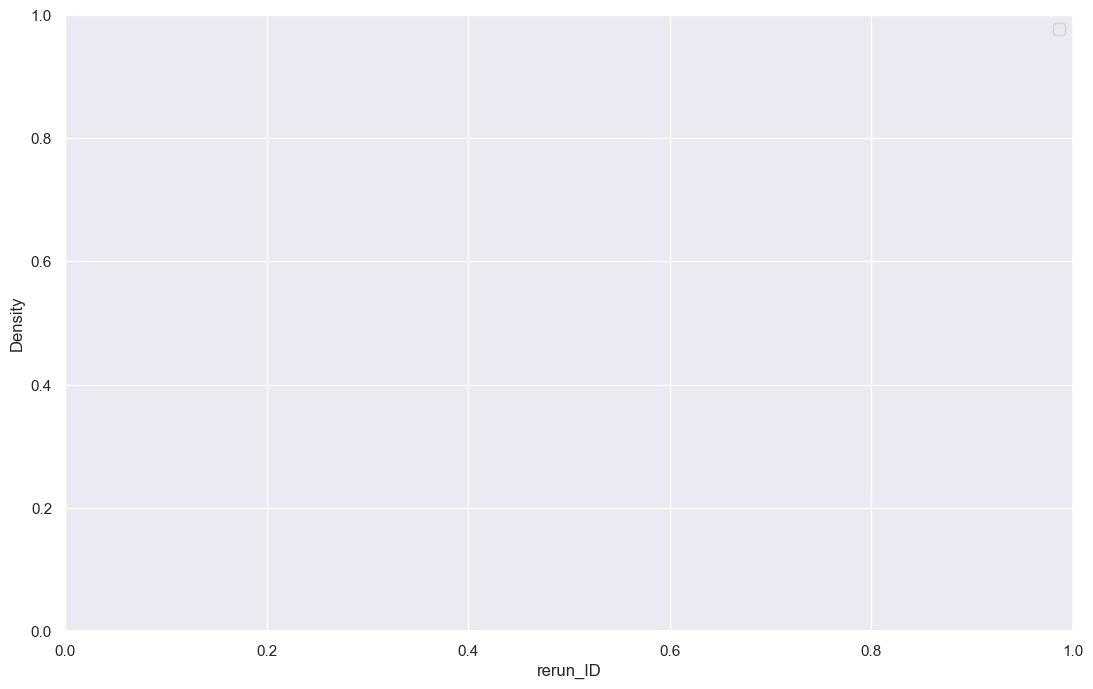

In [31]:
plot("rerun_ID")

In [32]:
df['rerun_ID'].nunique()

1

since there is only a single unique id, its not useful for classification and hence we'll be dropping this feature 

In [33]:
df = df.drop(['rerun_ID'], axis = 1)

In [34]:
print(le.inverse_transform([0]))

['GALAXY']


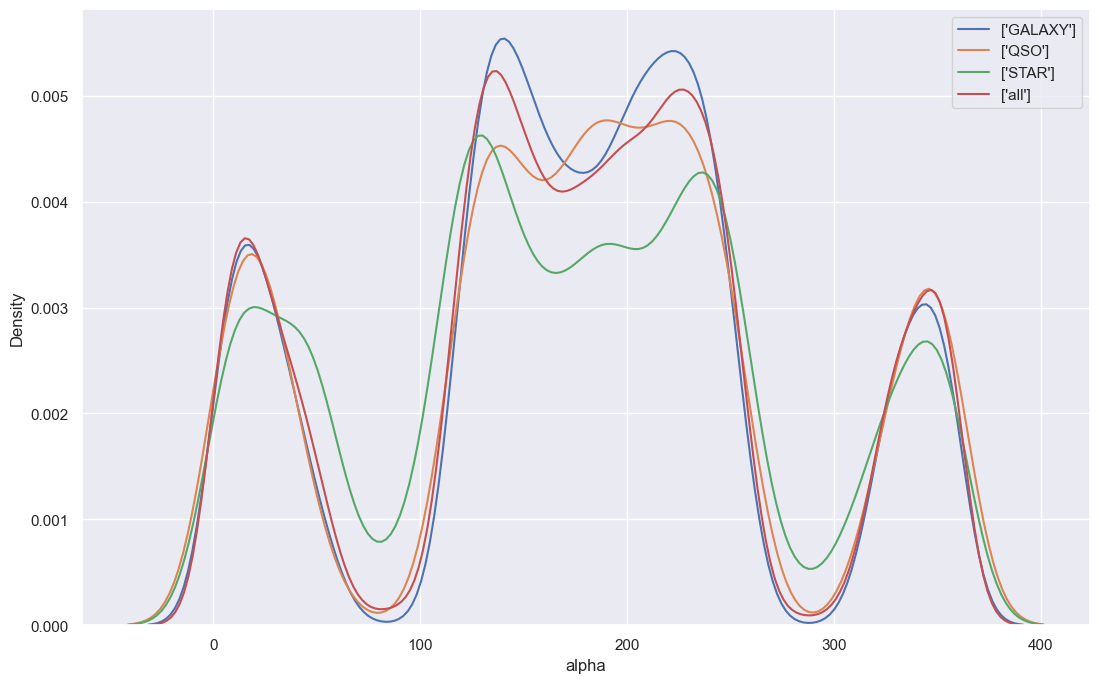

In [35]:
plot("alpha")

the distribution for stars are a bit different, hence we'll be keeping this feature 

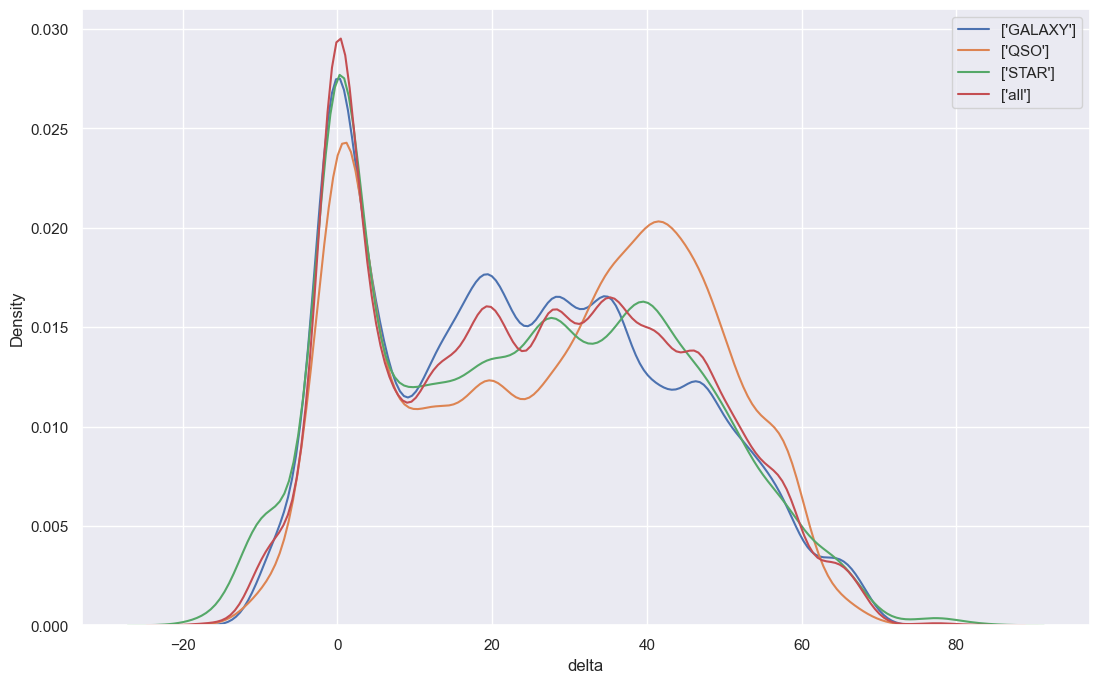

In [36]:
plot('delta')

the distribution for quasars are a bit different

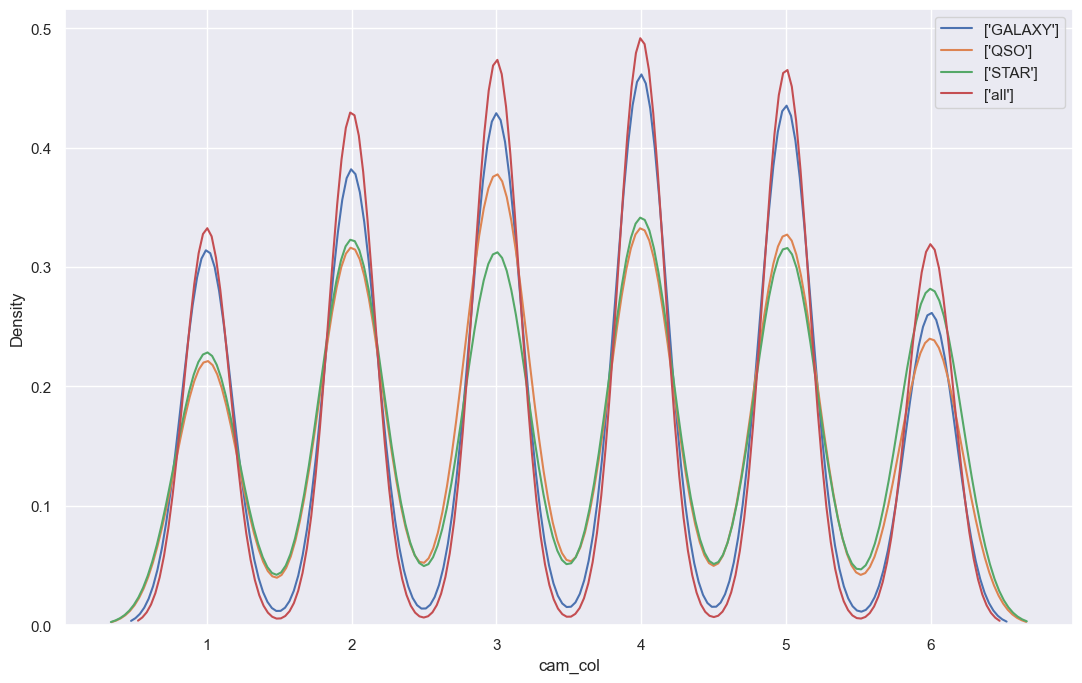

In [37]:
plot('cam_col')

In [38]:
df = df.drop('cam_col', axis = 1)

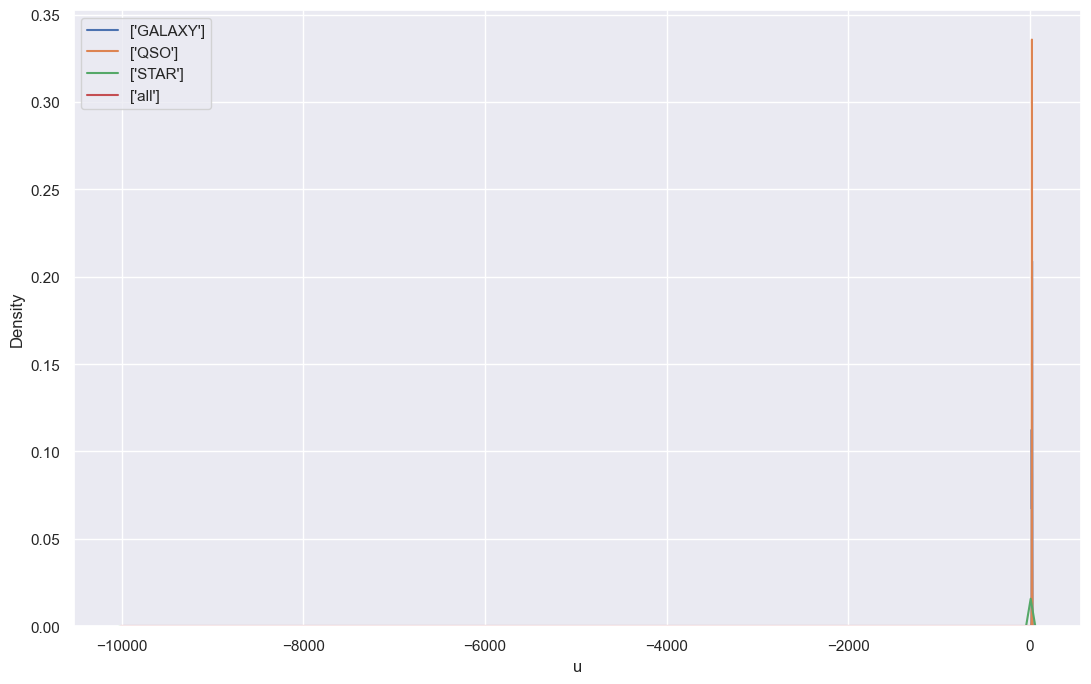

In [39]:
plot('u')

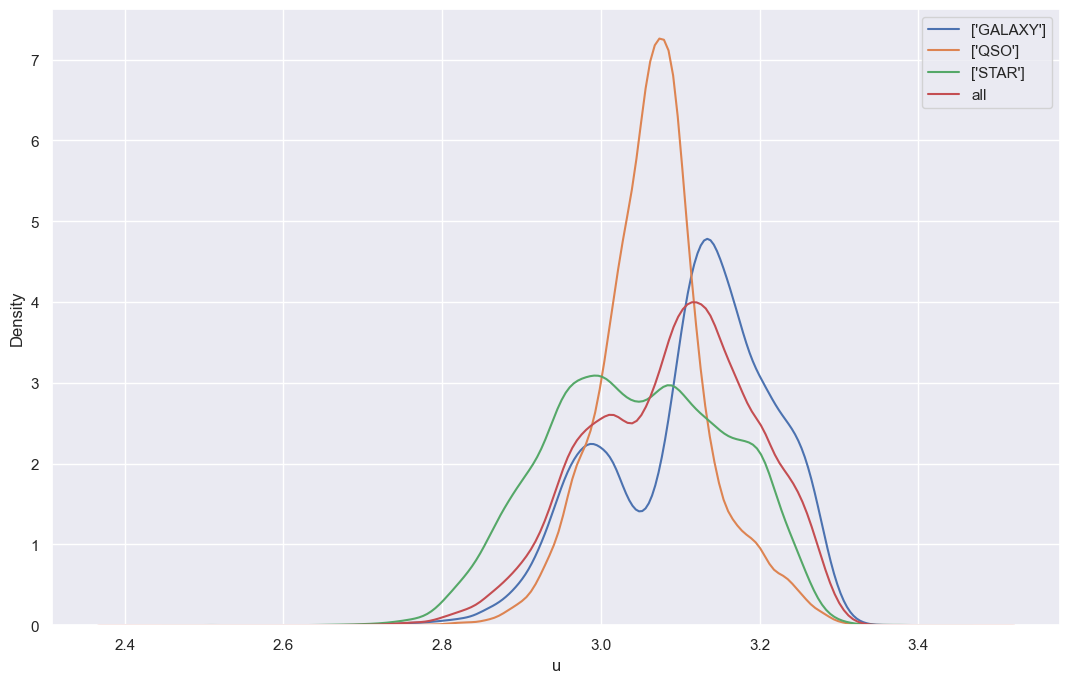

In [40]:
log_plot('u')

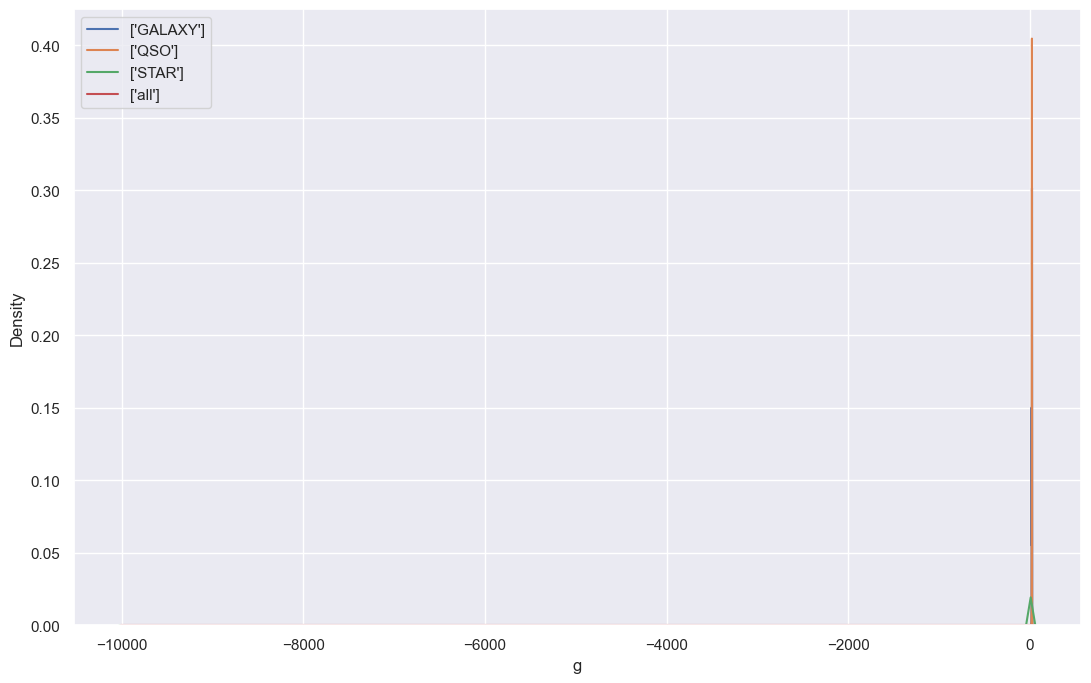

In [41]:
plot('g')

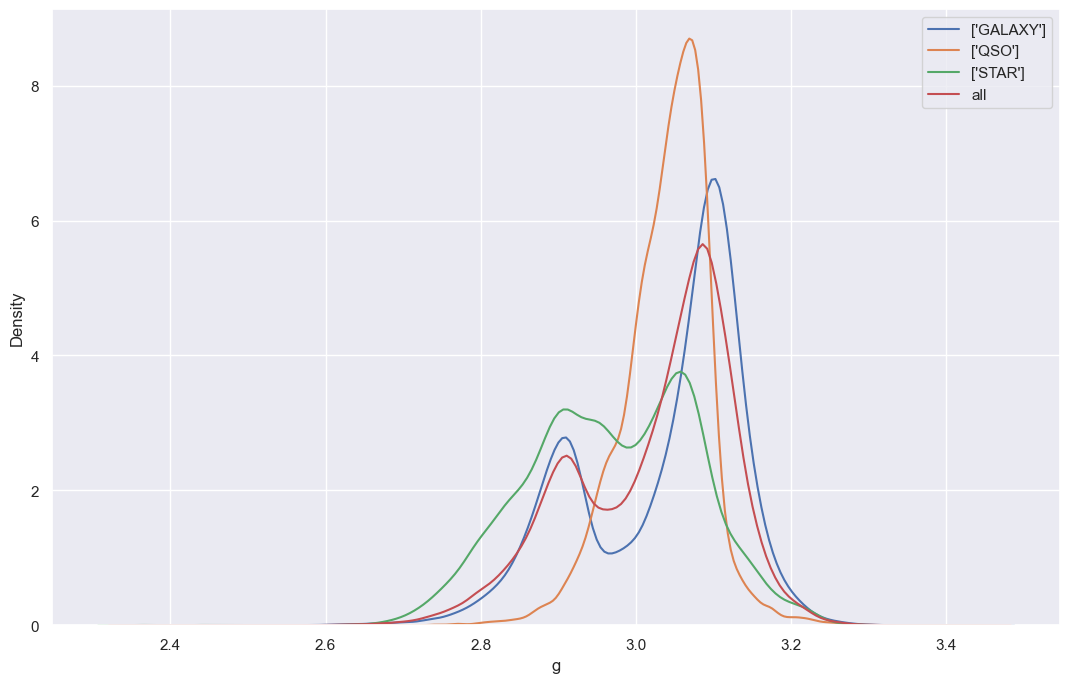

In [42]:
log_plot('g')

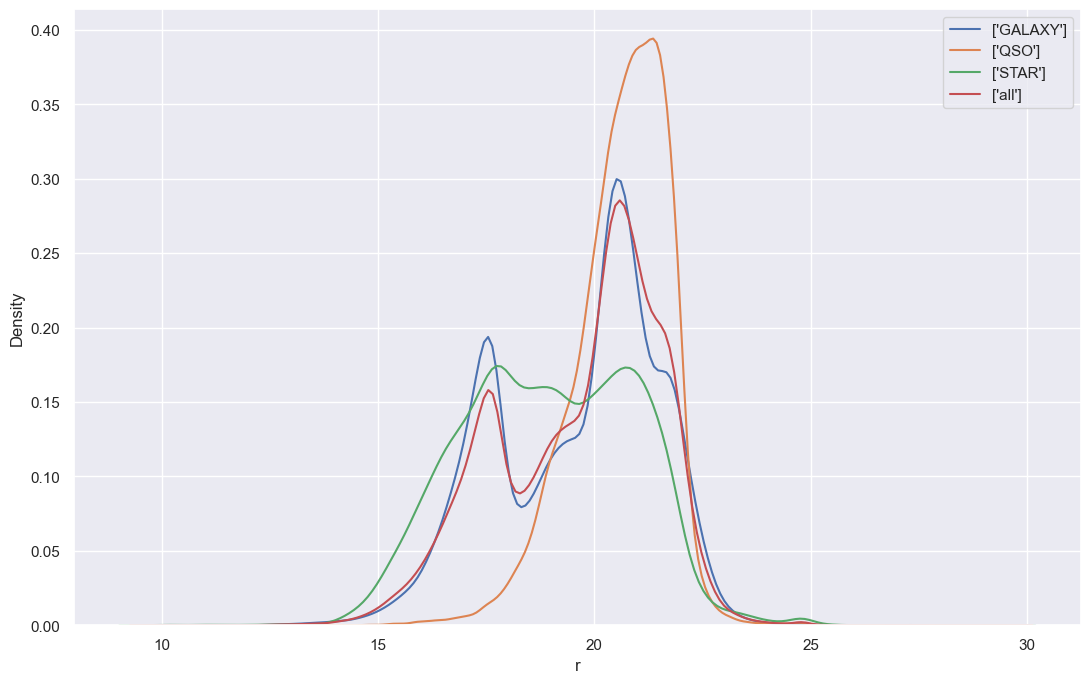

In [43]:
plot('r')

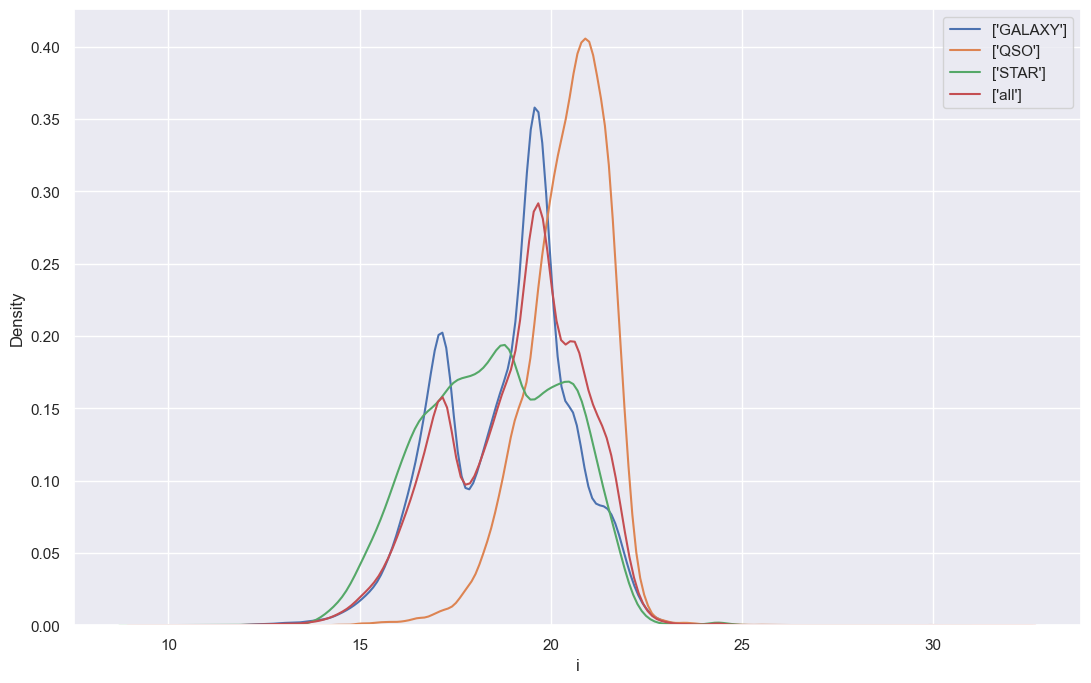

In [44]:
plot('i')

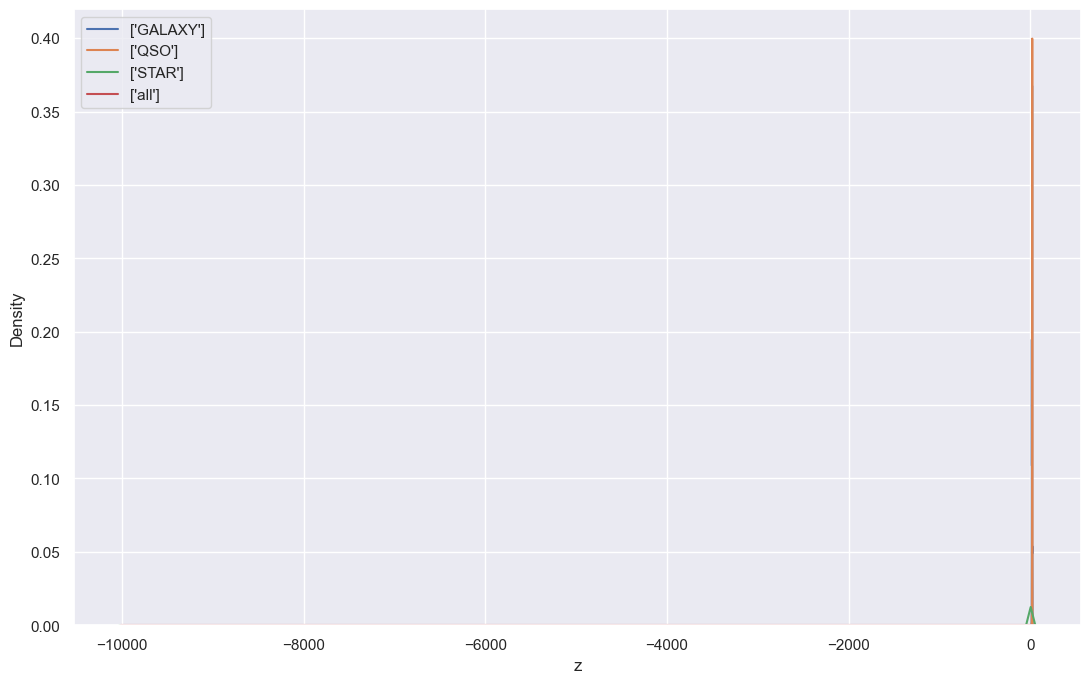

In [45]:
plot('z')

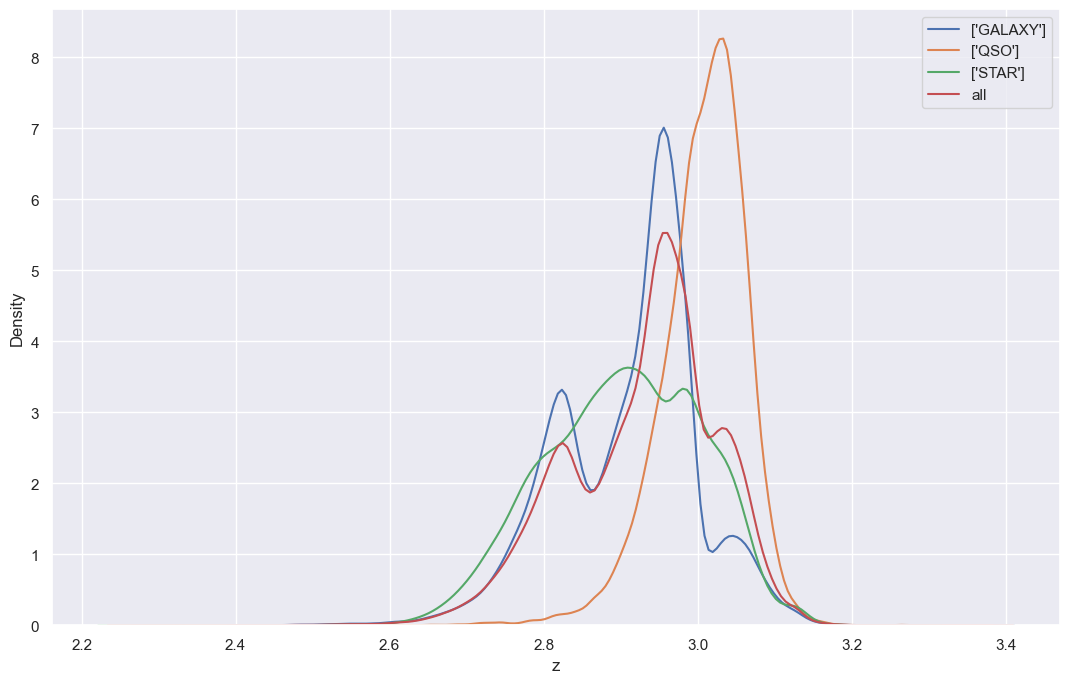

In [46]:
log_plot('z')

field_ID and run_ID have been deleted due to lack of distinction

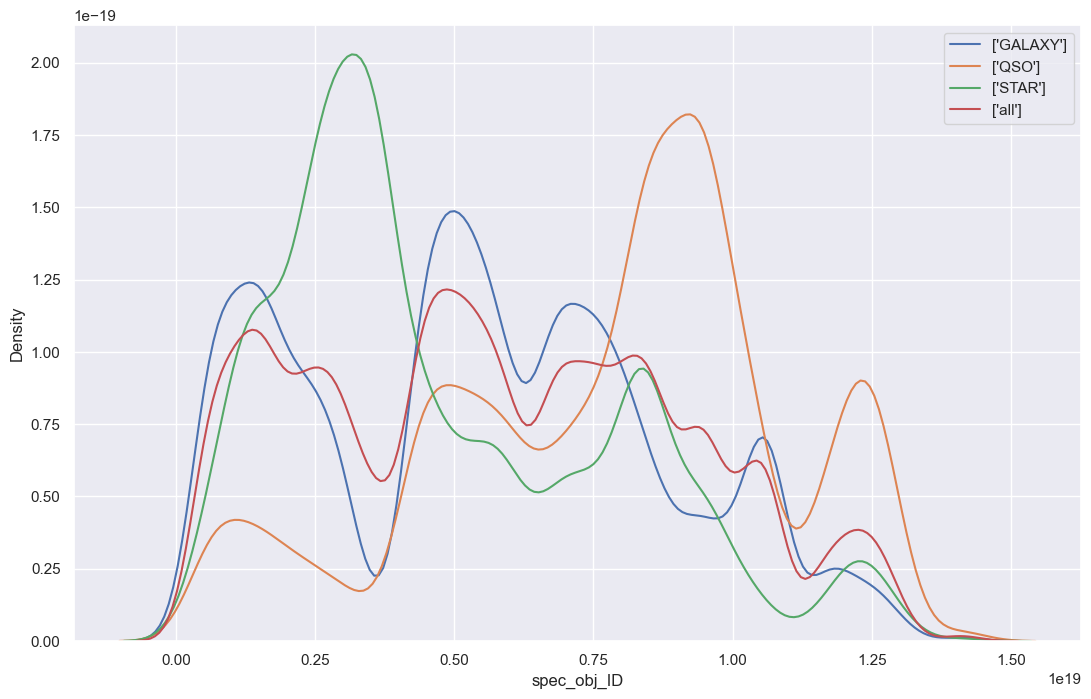

In [47]:
plot('spec_obj_ID')

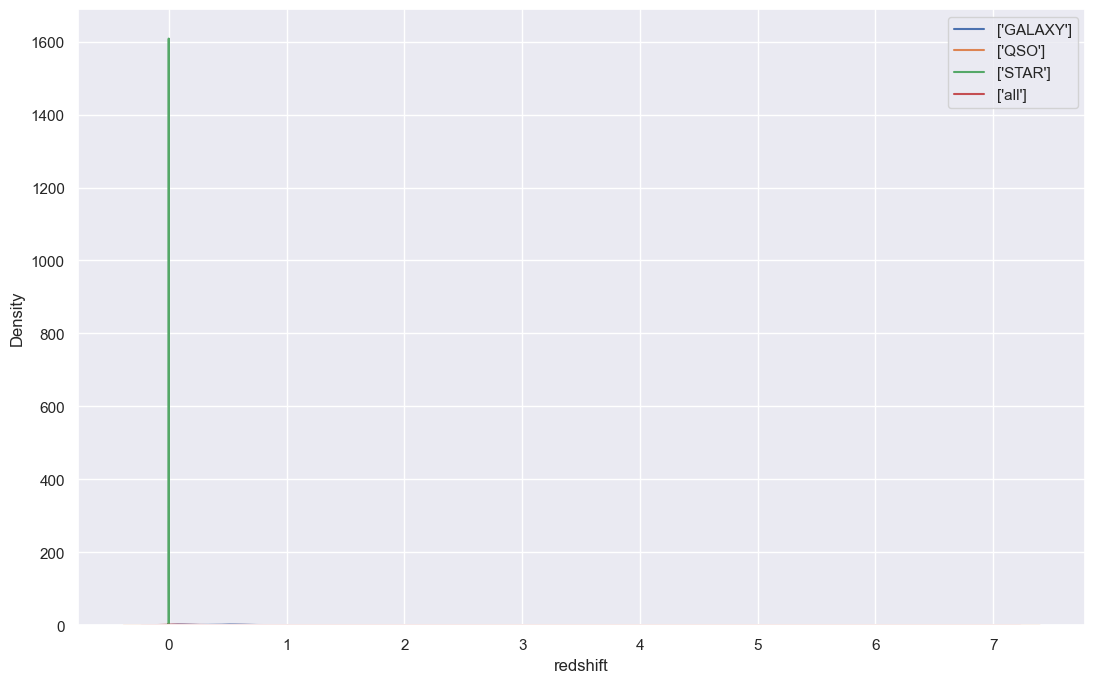

In [48]:
plot('redshift')

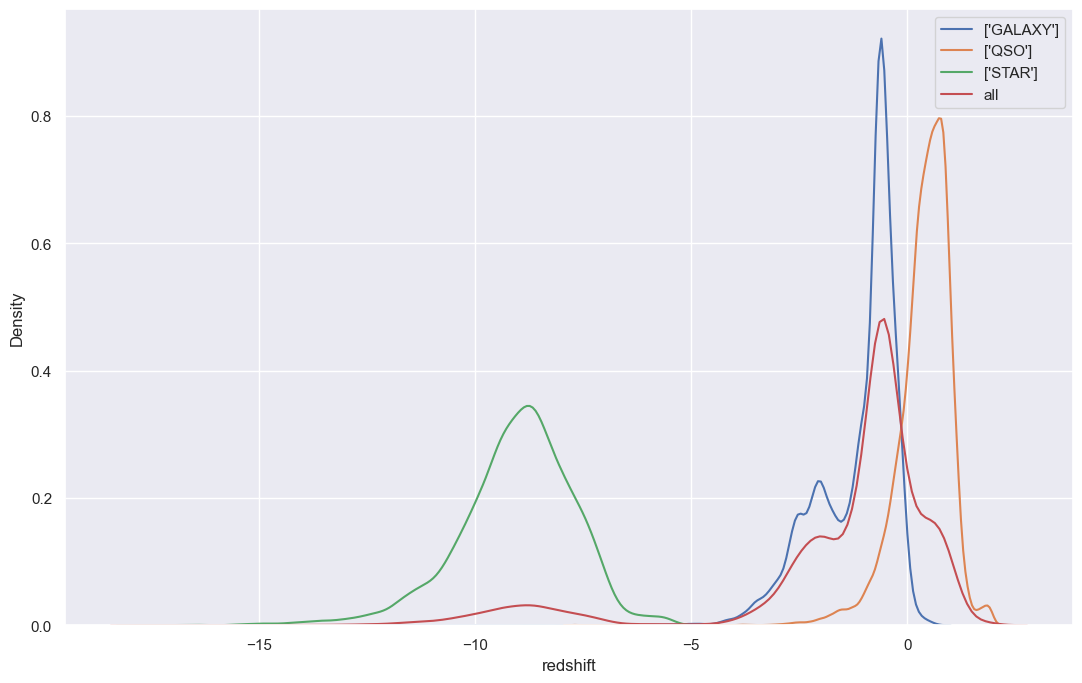

In [49]:
log_plot('redshift')

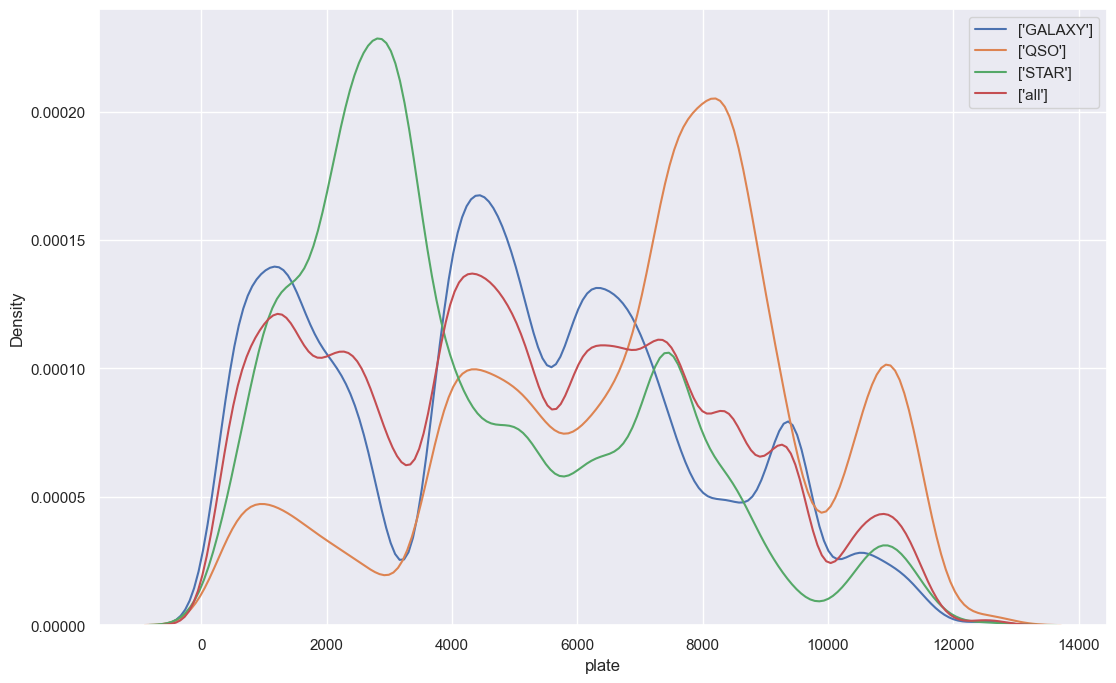

In [50]:
plot('plate')

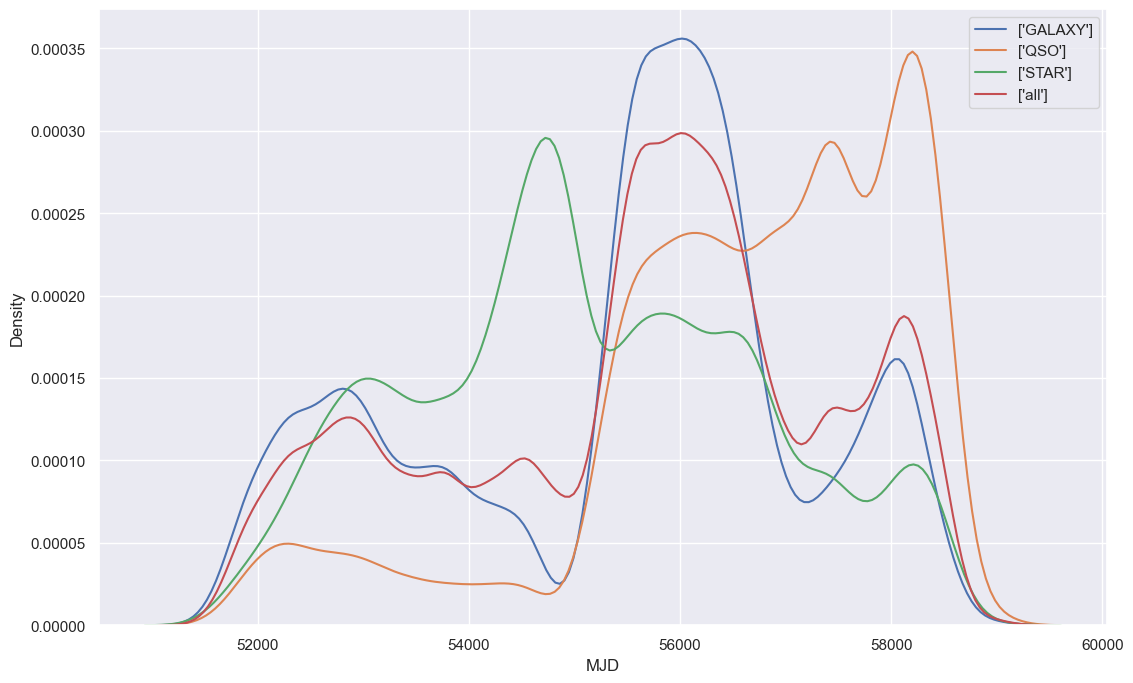

In [51]:
plot('MJD')

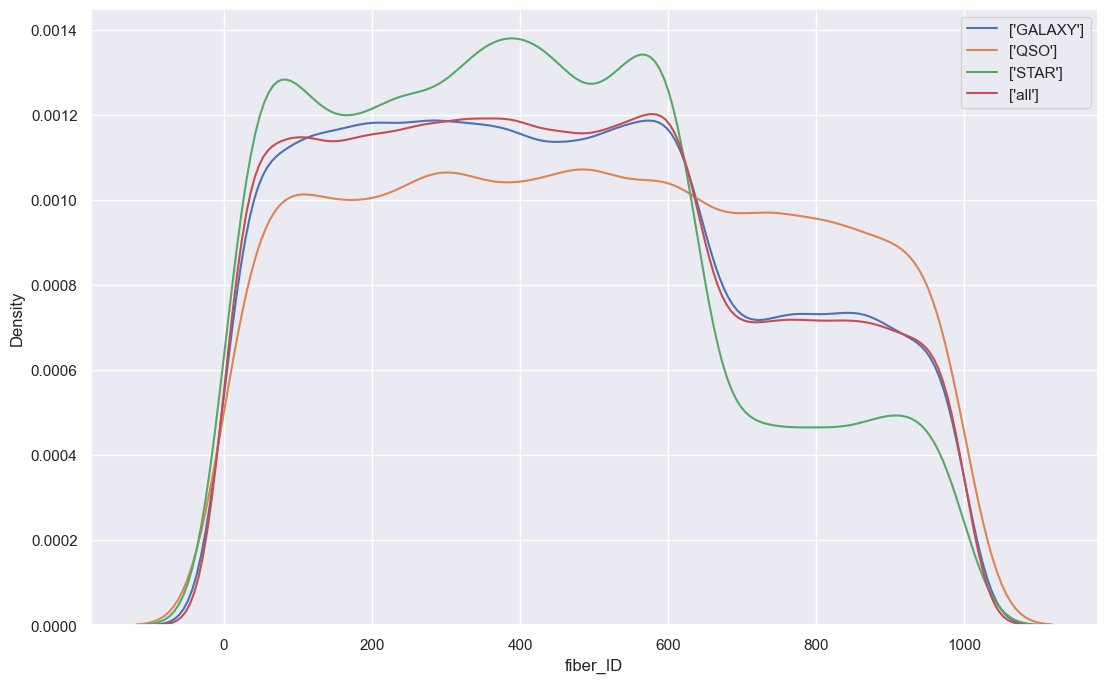

In [52]:
plot('fiber_ID')

In [53]:
df = df.drop('fiber_ID', axis = 1)

<Axes: xlabel='class', ylabel='count'>

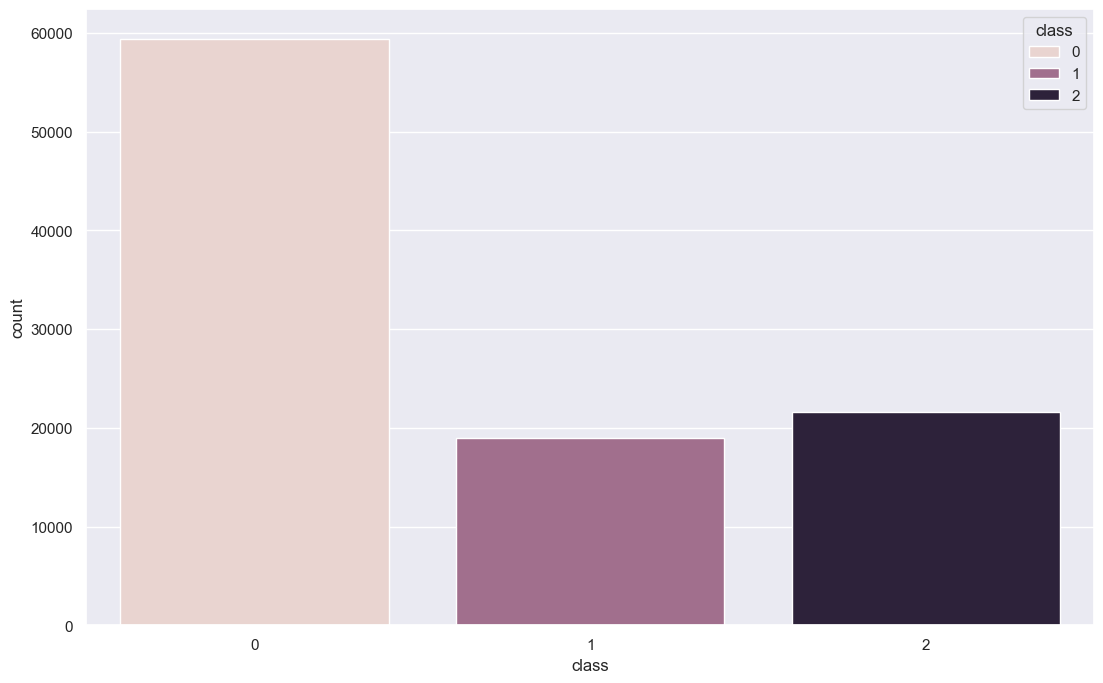

In [54]:
sns.countplot(data = df,x = df['class'], hue=df['class'])

as we observe, this is an imbalanced dataset, for better results we need to perform oversampling on the data 

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [56]:
x = df.drop('class', axis = 1)
y = df['class']

In [57]:
sm = SMOTE(random_state=1)
print('Original dataset size %s' % Counter(y))
x, y = sm.fit_resample(x,y)
print('Original dataset size %s' % Counter(y))

Original dataset size Counter({0: 59445, 2: 21594, 1: 18961})
Original dataset size Counter({0: 59445, 1: 59445, 2: 59445})


<Axes: xlabel='class', ylabel='count'>

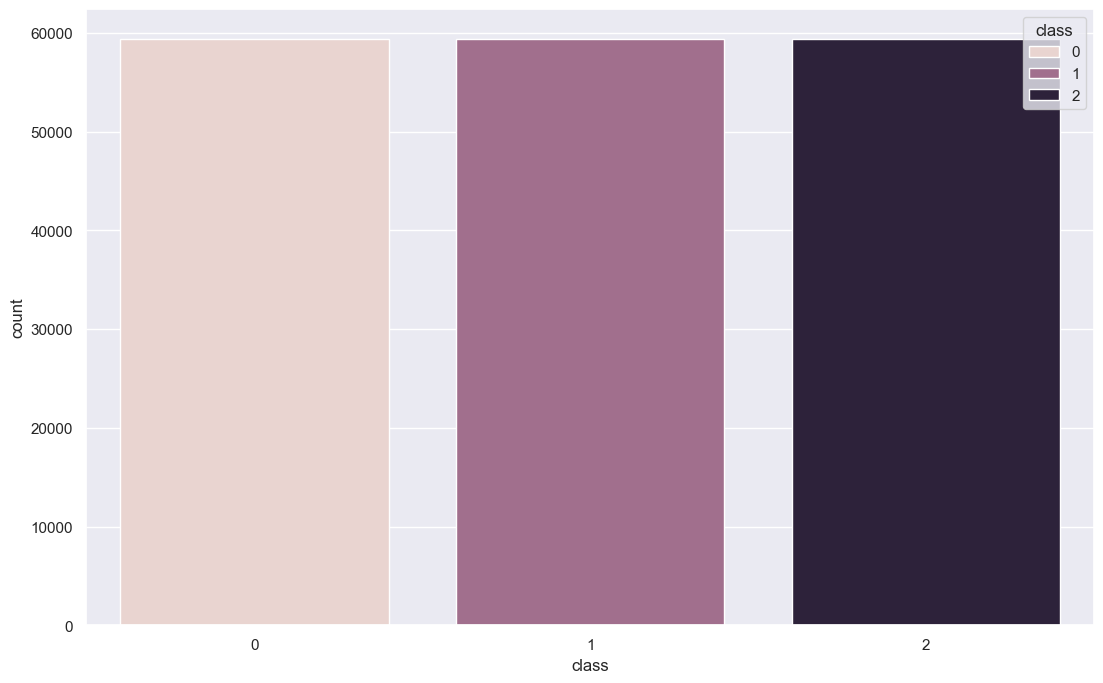

In [58]:
sns.countplot(x = y, hue = y)

now our data is well balanced 

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

we'll be comparing 3 models -
1. XGBM
2. Random Forest
3. Support Vector Machine 

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=1)

In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
svm_clf = svm.SVC(random_state=1)
svm_clf.fit(x_train, y_train)
predicted = svm_clf.predict(x_test)
svm_score = svm_clf.score(x_test, y_test)
svm_score


0.9673812041398314

In [63]:
classes = ['Galaxy', 'Star', 'Quasar']

In [77]:
print("Dimensions of y_test:", y_test.shape)
print("Dimensions of predicted:", predicted.shape)

Dimensions of y_test: (62418,)
Dimensions of predicted: (62418,)


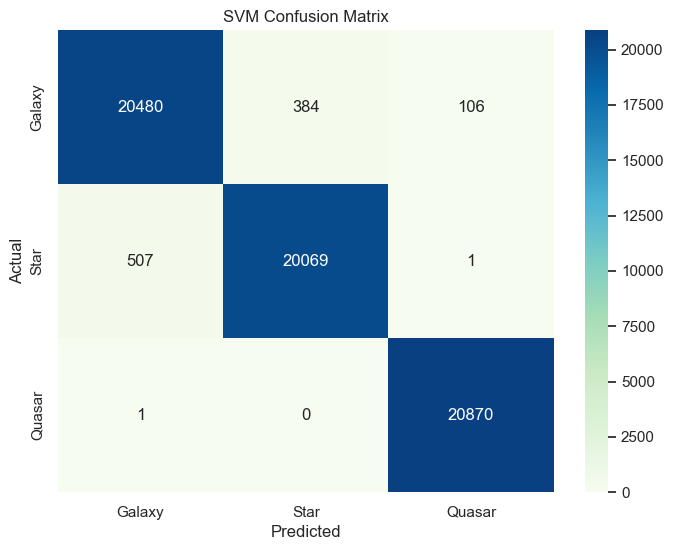

In [76]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20970
           1       0.98      0.98      0.98     20577
           2       0.99      1.00      1.00     20871

    accuracy                           0.98     62418
   macro avg       0.98      0.98      0.98     62418
weighted avg       0.98      0.98      0.98     62418



In [109]:
type(x_train)

numpy.ndarray

In [94]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(x_train, y_train)
predicted = forest.predict(x_test)
rf_score = forest.score(x_test, y_test)
rf_score

0.9838187702265372

In [80]:
print("Dimensions of y_test:", y_test.shape)
print("Dimensions of predicted:", predicted.shape)

Dimensions of y_test: (62418,)
Dimensions of predicted: (62418,)


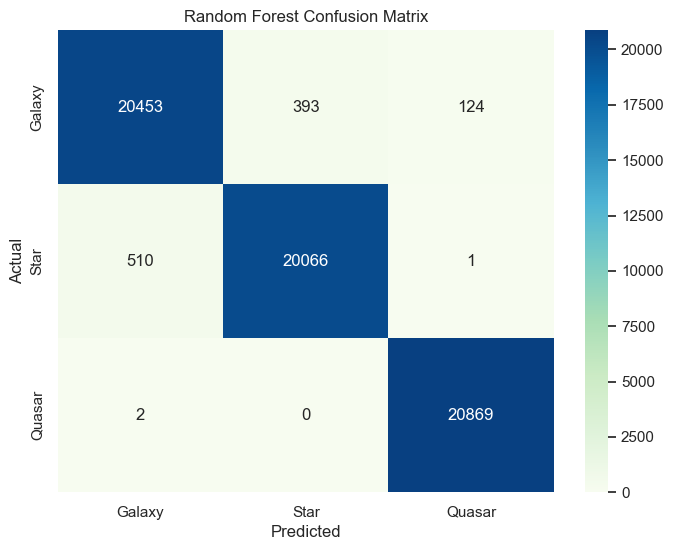

In [81]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20970
           1       0.98      0.98      0.98     20577
           2       0.99      1.00      1.00     20871

    accuracy                           0.98     62418
   macro avg       0.98      0.98      0.98     62418
weighted avg       0.98      0.98      0.98     62418



In [95]:
xgb = XGBClassifier(n_jobs = -1)
xgb.fit(x_train, y_train)
predicted = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
xgb_score


0.9820083950142587

In [88]:
print("Dimensions of y_test:", y_test.shape)
print("Dimensions of predicted:", predicted.shape)

Dimensions of y_test: (62418,)
Dimensions of predicted: (62418,)


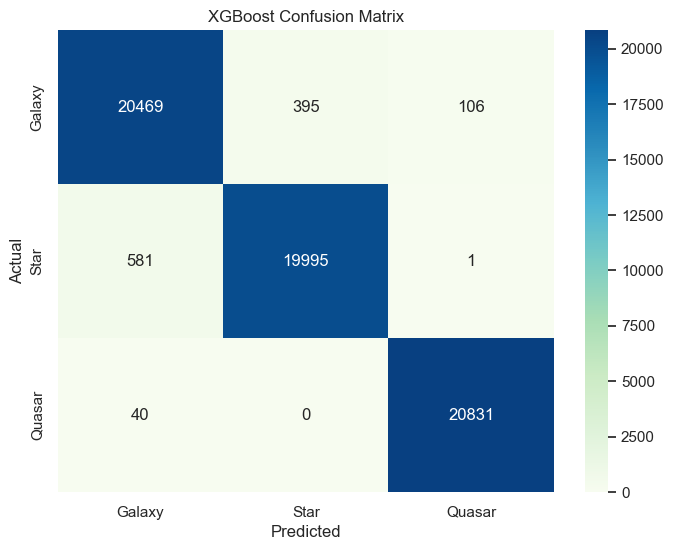

In [107]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20970
           1       0.98      0.97      0.98     20577
           2       0.99      1.00      1.00     20871

    accuracy                           0.98     62418
   macro avg       0.98      0.98      0.98     62418
weighted avg       0.98      0.98      0.98     62418



In [96]:
score = pd.DataFrame({'Model' : ['SVM', "Random Forest Classifier", 'XGBoost Classifier'], 'Score' : 0})
score

,Model,Score
0,SVM,0
1,Random Forest Classifier,0
2,XGBoost Classifier,0


In [102]:
score.loc[score['Model']=='SVM', 'Score'] = svm_score
score.loc[score['Model']=='Random Forest Classifier', 'Score'] = rf_score
score.loc[score['Model']=='XGBoost Classifier', 'Score'] = xgb_score
score = score.sort_values(by='Score', ascending=False)
score


,Model,Score
1,Random Forest Classifier,0.983819
2,XGBoost Classifier,0.982008
0,SVM,0.967381


Hence, Random Forest Classifier yields the best model for Stellar Classification.